# Artificial Intelligence course - UFAZ L3
## Practical Work 1 : Iris dataset classification using a Decision Tree
### Author : Asif Mammadov

In [1]:
from decision_node import Decision_Node
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

Decision tree is one of the common and effective tools for classification and prediction. In this practical work, I demonstrate the solution of classification problem using decision tree on an Iris dataset (https://archive-beta.ics.uci.edu/ml/datasets/iris). 


In [2]:
# Put the Iris data into dataframe
dataset = pd.read_csv("Iris.csv", delimiter=',')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Before going to implementation of decision trees, let us visualize the dataset to get more insights.

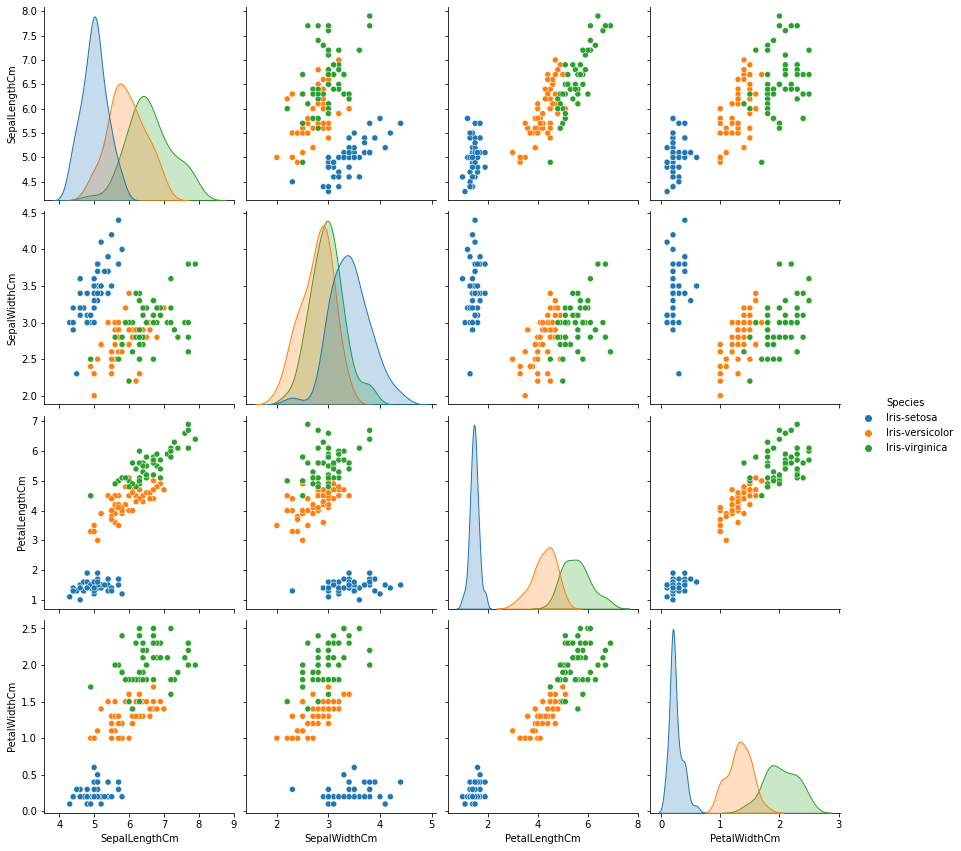

In [3]:
sns.pairplot(dataset.iloc[:, 1:], hue='Species', height=3)

Overall, we can see that "setosa" is quite distinguishable from other two species of Iris. We can strongly see this in petal length and petal width. It is much harder to draw differences between "vesicolor" and "virginica"

We categorize decision trees into 3 main methods: ID3/C4.5/C5.0 (I will generalize to C4.5 from now on), CART and CHAID. C4.5 and CART use a greedy splitting approach while CHAID uses contigency table. C4.5 uses entropy function to find the discriminating power while CART uses Gini function. This report focuses on C4.5 implementation.


In Decision trees, we create a tree of conditions that allow us to classify and predict given classes with high accuracy. To do so, we need to find features providing high distinction priority. We can represent this mathematically using the notion of discriminative power (practical work, annexes section).

#### Is the Decision Tree model used for supervised or unsupervised classification? Explain your answer.

Decision Trees are used for supervised classification. The model is trained on the given set of labels. In other words, we know what should be the expected output.

#### What is the nature of the attributes of the dataset?
The attributes are continuous and they represent values of length.

#### Do you think it is necessary to transform the attributes (scaling, standardization, ...)?
I do not think so. 

####  How are you going to use real value attributes to build your Decision Tree?
We can represents instances in a group of 3 values, depending on the length: small, average, large.

In [4]:
# Building decision node
dn = Decision_Node(dataset)

In [5]:
print("||Number of instances by attribute and by group||\n")
dn.print_attr_groups_counted()

||Number of instances by attribute and by group||

Attribute:  SepalLengthCm

Group 0:
           Species  SepalLengthCm
0      Iris-setosa             43
1  Iris-versicolor              6
2   Iris-virginica              1

Group 1:
           Species  SepalLengthCm
0      Iris-setosa              7
1  Iris-versicolor             31
2   Iris-virginica             12

Group 2:
           Species  SepalLengthCm
0  Iris-versicolor             13
1   Iris-virginica             37
2      Iris-setosa              0
----------------------------------------------------------------------------------------------------
Attribute:  SepalWidthCm

Group 0:
           Species  SepalWidthCm
0      Iris-setosa             1
1  Iris-versicolor            30
2   Iris-virginica            19

Group 1:
           Species  SepalWidthCm
0      Iris-setosa            13
1  Iris-versicolor            16
2   Iris-virginica            21

Group 2:
           Species  SepalWidthCm
0      Iris-setosa            36

 #### Have a look back at Fig. 2 p. 5: what relationship is there between this figure and the class repartitions of Table 1?
 Both the figure and the table represent the distribution of the species along the value of lenght. We can clearly deduce that all the instances of group 0 (small) are setosas. We can say the same about versicolor (to group 1) and virginica (to group 2) but with less precision (not absolutely).
 
 ####  So basically, do you wish to continue adding branches in the tree? Explain your answer.
 Yes, I do. Because right now we can surely deduce only about setosas. Using Petal Length to distinct between versicolor and virginica is not enough here. We need to find more differences, thus using more conditions. 

In this simple example we can deduce the property with highest discrimination without any calculations. But in more complex cases we use discriminative power.

In [6]:
print("||Entropy||\n")
dn.print_attr_groups_entropy()

||Entropy||

SepalLengthCm
Group 0 : 0.6670730006443818
Group 1 : 1.31883378807372
Group 2 : 0.8267463724926178
--------------------------------------------------
SepalWidthCm
Group 0 : 1.0855093773010511
Group 1 : 1.5569685454909616
Group 2 : 1.0971245697587872
--------------------------------------------------
PetalLengthCm
Group 0 : -0.0
Group 1 : 0.32744491915447627
Group 2 : 0.32744491915447627
--------------------------------------------------
PetalWidthCm
Group 0 : -0.0
Group 1 : 0.4021791902022728
Group 2 : 0.4021791902022728
--------------------------------------------------


In [7]:
print("||Discriminative power for each attribute||\n")
dn.print_discriminative_powers()

||Discriminative power for each attribute||

SepalLengthCm : 0.6474114469842496
SepalWidthCm : 0.338428336537556
PetalLengthCm : 1.3666658879515055
PetalWidthCm : 1.3168430405863076


As it was observed previously, petal length has the highest discriminative power. So it is smart to put it as the first condition.

Let's continue the segmentation! Let us say we set SW as the first discriminative variable1 . Table 2 presents the class repartitions for this attribute.

#### Does the use of this attribute allow discrimination between classes?
No. Because they are well distributed there over the groups. This attribute has the lowest discriminative power.

#### Explain the procedure to continue segmenting the data.
We can check entropies of groups to see distinctions. For group 0 entropy is 0. It means that all the instances are of the same species. Thus we reached the pure node. We move on to next groups. Their values are the same and we now work only on them to find discriminative power of their attributes, and divide them further. This algorithm will repeat recursively until we are satisfied with precision and tree complexity.

In [8]:
new_dataset = utils.exclude(dn.get_dataset(), dn.get_attr_groups()['PetalLengthCm'][0])
dn2 = Decision_Node(new_dataset, N_groups=2)

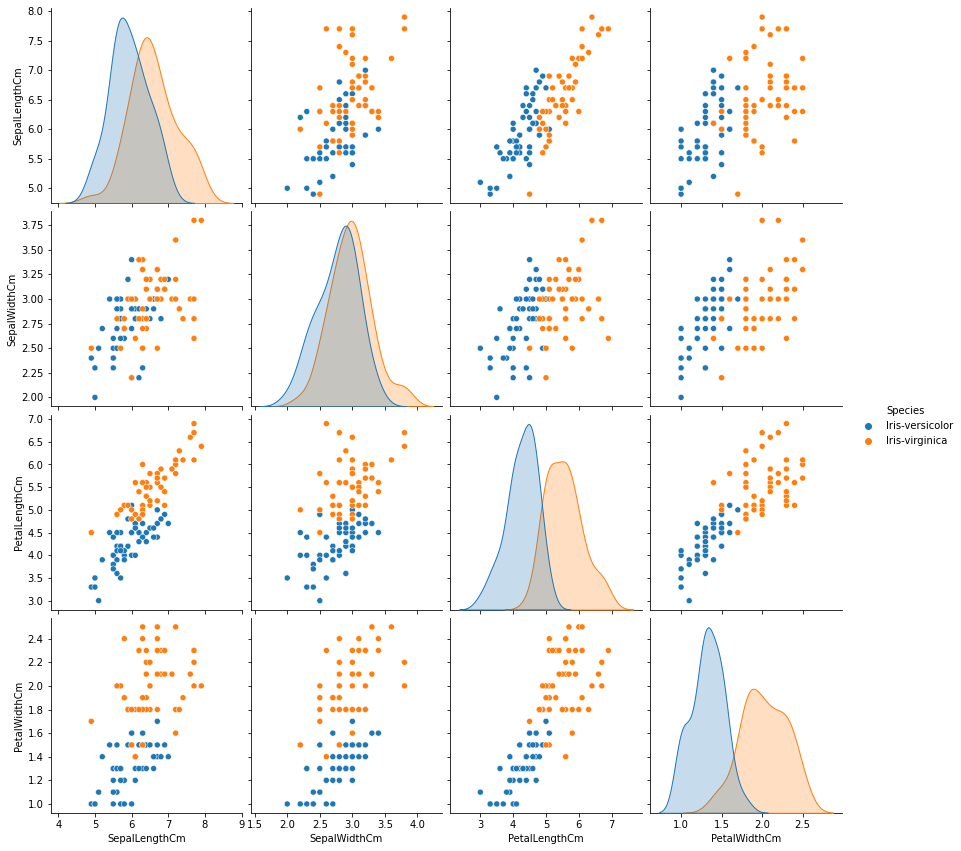

In [9]:
sns.pairplot(new_dataset.iloc[:, 1:], hue='Species', height=3)

In [10]:
print("||Number of instances by attribute and by group||\n")
dn2.print_attr_groups_counted()

||Number of instances by attribute and by group||

Attribute:  SepalLengthCm

Group 0:
           Species  SepalLengthCm
0  Iris-versicolor             36
1   Iris-virginica             14

Group 1:
           Species  SepalLengthCm
0  Iris-versicolor             14
1   Iris-virginica             36
----------------------------------------------------------------------------------------------------
Attribute:  SepalWidthCm

Group 0:
           Species  SepalWidthCm
0  Iris-versicolor            30
1   Iris-virginica            20

Group 1:
           Species  SepalWidthCm
0  Iris-versicolor            20
1   Iris-virginica            30
----------------------------------------------------------------------------------------------------
Attribute:  PetalLengthCm

Group 0:
           Species  PetalLengthCm
0  Iris-versicolor             46
1   Iris-virginica              4

Group 1:
           Species  PetalLengthCm
0  Iris-versicolor              4
1   Iris-virginica             46
----

In [11]:
print("||Entropy||\n")
dn2.print_attr_groups_entropy()

||Entropy||

SepalLengthCm
Group 0 : 0.8554508105601306
Group 1 : 0.8554508105601306
--------------------------------------------------
SepalWidthCm
Group 0 : 0.9709505944546686
Group 1 : 0.9709505944546686
--------------------------------------------------
PetalLengthCm
Group 0 : 0.4021791902022728
Group 1 : 0.4021791902022728
--------------------------------------------------
PetalWidthCm
Group 0 : 0.32744491915447627
Group 1 : 0.32744491915447627
--------------------------------------------------


In [12]:
print("||Discriminative power for each attribute||\n")
dn2.print_discriminative_powers()

||Discriminative power for each attribute||

SepalLengthCm : 0.14454918943986939
SepalWidthCm : 0.02904940554533142
PetalLengthCm : 0.5978208097977271
PetalWidthCm : 0.6725550808455236


Petal Width has the highest discriminative power and we choose it for separation.